In [1]:
# -*- coding: utf-8 -*-
"""

@author: Brigi
"""
# For creating a scrollbar, a widget can be used in Jupyter notebooks
# reason for choosing ipywidgets is, it is easier to use than tkinter  
# and no other graphical packages needed to be installed
# in order to work with it.
# while a disadvantage is it is not working in spyder
# only in Jupyter notebooks
import ipywidgets as widgets
# Imported csv which is for processing data that stored in a CSV file. 
import csv
# used 'as' to shorten the name of matplotlib for easier use 
import matplotlib.pyplot as pyplot
# reason for using numpy can be found in the auxiliary document
import numpy
# used doctest for testing variables at the bottom of the code
import doctest

In [2]:
# These two widgets allow to change the parameters in the
# original equation
# The  first scroll bar represents 
# the average population density variable (p)
# Challange: Initially found widget int.Slider which displays 
# integer numbers only. I needed to set up float to display decimals.
# Source of slider widget code:
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Numeric-widgets
# The step value is set up to change 0.01 at the time which gives the user
# the ability to refine the variable from 0 to 10
# initial value on the scroll bar is set to 1.30 as given in the equation
Parishes_parameter = widgets.FloatSlider(min=0,
    max=10,
    step=0.01,
    description='Population:',
    value=1.3)
display(Parishes_parameter)


FloatSlider(value=1.3, description='Population:', max=10.0, step=0.01)

In [3]:
# Slider represents the average rats caught per week variable
# As the above, the initial value is set to 0.8 as in the equation
# and the initial value can be adjusted by 0.1 step by the user
Rats_parameter =widgets.FloatSlider(min=0,
    max=10,
    step=0.01,
    description='Rats:',
    value=0.8)
display(Rats_parameter)

FloatSlider(value=0.8, description='Rats:', max=10.0, step=0.01)

In [4]:
# def read_txt is a function which reads in the 2 files (rats and parishes) in the same time
# Instead of using f =open .... twice, the code is shorter using the function
# it has one parameter (passz)
# When the function is called, (further down in this block) 
# the read_text function name is passed in to open the txt files and convert them to float 

def read_txt (passz):
    # this is a doctest to check the first position of the
    # Death_parishes.txt file what the program expects to be 0.0
    # at the bottom of the code
    """
    >>> read_txt('Death_parishes.txt')[0][0]
    0.0
    
    """
    parishes = [] # create an empty list
    f= open (passz, newline='')
    reader = csv.reader(f)
    
    for row in reader: # A list of rows
        rowlist = [] # make a new list before each row is processed
       
        for value in row: # A list of value
            
             rowlist.append(float(value)) # do something with the values
             # converted values (string) to float 
            # print(value) # Floats - do something with values
        parishes.append(rowlist)
    return parishes

# calling the function to read in the rats and parishes file
rats = read_txt('death.rats.txt')
parishes = read_txt('Death_parishes.txt')

In [5]:
# After importing numpy above, it is easier to call it and put the variables
# into a 2D array.
rats = numpy.array(rats)
parishes = numpy.array(parishes)

In [6]:
# Not neccesary, just checked if the 2D array is working correctly
# print (rats)
# print (parishes)

In [7]:
# This is step 2 where I calculated the avarage death using the given 
# equation
# this is the equation from the assignment2 description d = (0.8 x r) x (1.3 x p)
# changed the original values in the equation (from 0.8 and 1.3 respectively) 
# to the values which I have on the scrollbar widget. 
avg_death= (rats*Rats_parameter.value) * (parishes*Parishes_parameter.value)
print(avg_death)

[[    0.       0.       0.   ...  8536.32  8536.32  8536.32]
 [    0.       0.       0.   ...  8536.32  8536.32  8536.32]
 [    0.       0.       0.   ...  8536.32  8536.32  8536.32]
 ...
 [ 4680.    4680.    4680.   ...  3744.    3744.    3744.  ]
 [ 4680.    4680.    4680.   ...  3744.    3744.    3744.  ]
 [10670.4  10670.4  10670.4  ... 10670.4  10670.4  10670.4 ]]


In [8]:
# this is to write the absolute death out to a file
# Instead of f=open I used with open
with open('absolut_death.txt', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for row in avg_death: # go through all rows in avg_death
        rowlist = [] # make a new list before each row is processed
   
        for value in row: # A list of value egy sor minden oszlopan megy vegig
        
            rowlist.append(float(value)) # puts the values in
        
        # print(value) # Floats - do something with values
        spamwriter.writerow(rowlist)

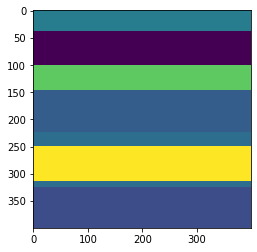

In [9]:
# the below two maps show the rats and 
# the parishes raster London maps respectively
pyplot.imshow(rats)
pyplot.show()

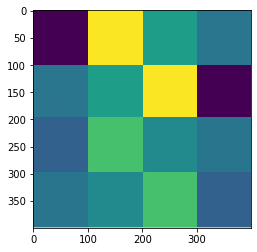

In [10]:
pyplot.imshow(parishes)
pyplot.show()

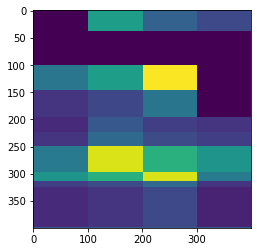

In [11]:
# when putting pyplot.show(avg_death) I received an error message
# and realised that dont need any keyword in the 2nd brackets
# when the values changed on the scrollbar at the top
# and re-run the code, the numbers are changed in written out file
# however the colours dont change as propotions of rats 
# and deaths comparing to each other does not change 
pyplot.imshow(avg_death)
pyplot.show()

In [13]:
# This runs the doctest, which is above in 4th block
doctest.testmod(verbose=True)

Trying:
    add(1, 2)
Expecting:
    3
ok
Trying:
    read_txt('Death_parishes.txt')[0][0]
Expecting:
    0.0
ok
1 items had no tests:
    __main__
2 items passed all tests:
   1 tests in __main__.add
   1 tests in __main__.read_txt
2 tests in 3 items.
2 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=2)